# Logistic Regression

## Dependency

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')

## Paramter

In [5]:
SAVEFIG_01 = '../image/logistic_exponential_function.png'
SAVEFIG_02 = '../image/logistic_sigmoid_function.png'
SAVEFIG_03 = '../image/logistic_cost_function.png'

## Concept

In **binary classification** where $y$ is labelled as **0 for negative** and **1 for positive**, **logistic regression** outputs a floating number between 0 and 1. Let $h_{\theta}(x)$ be the output of logistic regression. Use $\theta$ and $\beta$ for parameters of logistic regression.

$$
0 \le h_{\theta}(x) \le 1 
$$

And we treat it as

$$
\text{Predict 1} \quad \text{if }h_{\theta}(x) \ge 0.5
$$
$$
\text{Predict 0} \quad \text{if }h_{\theta}(x) < 0.5
$$

If we are **conservative** in predicting positive, we can lower the threshold, such as $P(y = 1) \ge 0.1$. It means that, for example, suppose $P(y = 1)$ means someone at default. We don't have to wait until the model outputs something more than 0.5. As low as 0.1, we can just judge it to be default, if we are conservative.

In statistics, those probabilities are called **conditional probability** expressed as $P(y = 0 | x; \theta)$ and $P(y = 1 | x; \theta)$. For example, we interpret $P(y = 1 | x; \theta)$ as, the probability to predict $y = 1$ when we have the data $x$ and when we use the parameters $\theta$.

We can use logistic regression as the **production model**. Or use it as **inference tool** to understand the role of the input variables in explaining the outcome, because logistic regression produces the **interpretable model**.

Logistic regression output $h_{\theta}(x)$ is computed by,

$$
h_{\theta}(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

This function is called **sigmoid function**.

## Sigmoid Function

Use $g(z)$ for sigmoid function below,

$$
g(z) = \frac{1}{1 + e^{-z}}
$$

To understand sigmoid function, start from **exponential function** in the denominator. Exponential function with the **negative input** produces values like below.

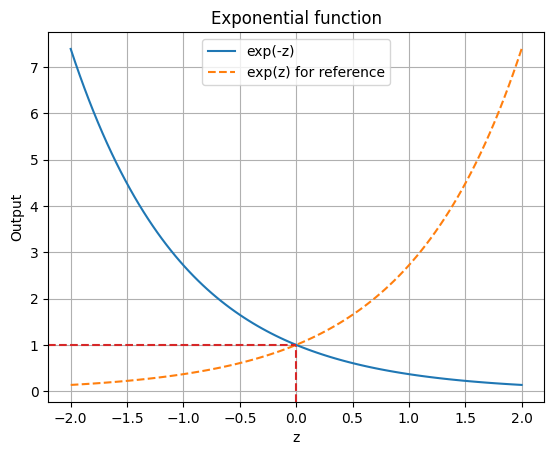

In [6]:
z = np.linspace(-2, 2, 100)

plt.plot(z, np.exp(-z), label='exp(-z)')
plt.plot(z, np.exp(z), linestyle='--', label='exp(z) for reference')
plt.axhline(y=1, xmin=0, xmax=0.5, linestyle='--', color='tab:red')
plt.axvline(x=0, ymin=0, ymax=0.15, linestyle='--', color='tab:red')
plt.title('Exponential function')
plt.xlabel('z')
plt.ylabel('Output')
plt.grid()
plt.legend()

plt.savefig(SAVEFIG_01)
plt.show()

 When input of exponentail function is negative of the input like $e^{-z}$, 

- When $z > 0$, $e^{-z} < 1$. As $z \gg 0$, $e^{-z} \approx 0$.
- When $z < 0$, $e^{-z} > 1$, As $z \ll 0$, $e^{-z} \approx \infty$.

The behavior of sigmoid function is visualized below

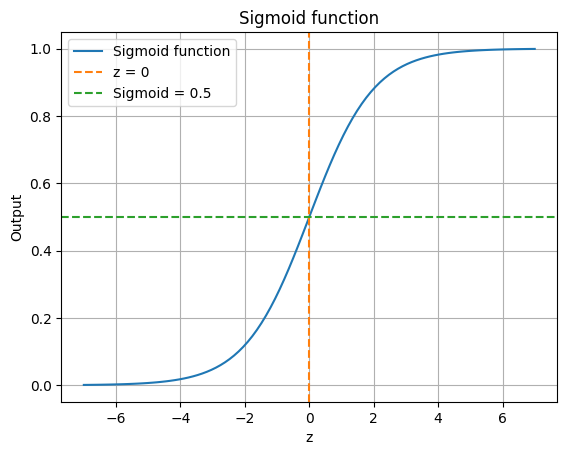

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


z = np.linspace(-7, 7, 100)
g = sigmoid(z)

plt.plot(z, g, label='Sigmoid function')
plt.axvline(x=0, linestyle='--', color='tab:orange', label='z = 0')
plt.axhline(y=0.5, linestyle='--', color='tab:green', label='Sigmoid = 0.5')
plt.grid()
plt.title('Sigmoid function')
plt.xlabel('z')
plt.ylabel('Output')
plt.legend()

plt.savefig(SAVEFIG_02)
plt.show()

Using our finding from exponential function to sigmoid function,

- When $z > 0$, $e^{-z} < 1$, $1 + e^{-z} < 2$, $\frac{1}{1 + e^{-z}} > \frac{1}{2} = 0.5$. As $z \gg 0$, $e^{-z} \approx 0$, $1 + e^{-z} \approx 1$, $\frac{1}{1 + e^{-z}} \approx 1$
- When $z < 0$, $e^{-z} > 1$, $1 + e^{-z} > 2$, $\frac{1}{1 + e^{-1}} < \frac{1}{2} = 0.5$. As $z \ll 0$, $e^{-z} \approx \infty$, $1 + e^{-z} \approx \infty$, $\frac{1}{1 + e^{-z}} \approx 0$

We sometimes see a term, **logistic function**, instead of sigmoid function, but we treat they are the same.

For sigmoid function, we sometimes see the following equation instead of $\frac{1}{1 + e^{-z}}$, but it's the same as the equation we have been using so far.

$$
g(z) = \frac{e^z}{1 + e^z}
$$

Same because multiplying $e^{z}$ to both numerator and denominator of $\frac{1}{1 + e^{-z}}$,

$$
\frac{e^{z}}{(1 + e^{-z})e^{z}} = \frac{e^z}{e^z + e^{-z + z}} = \frac{e^z}{e^z + e^0} = \frac{e^z}{e^z + 1}
$$

## Optimization Objective

To use logistic regression, we need to compute parameters $\theta$. To achive that, we set the following **optimization objective**. $n$ is the number of data. $p$ is the number of features. $h_{\theta}(x)$ is logistic regression model output (sigmoid function). $\theta$ is parameters. $\lambda$ is regularization parameter.

$$
\underset{\theta}{\min} \left[ \frac{1}{n} \sum_{i = 1}^{n} - y^{(i)} \log h_{\theta}(x^{(i)}) - (1 - y^{(i)}) \log (1 - h_{\theta} (x^{(i)})) \right] + \frac{\lambda}{2n} \sum_{j = 1}^{p} \theta_j^2
$$

The above equation means that we wanna try different numbers for parameter $\theta$ to minimize the above value.

This math takes the form of,

$$
\min \left( \text{Loss} + \lambda \times \text{Regularization} \right)
$$

The math also can be expressed as,

$$
\underset{\theta}{\min} \left[ \frac{1}{n} \sum_{i = 1}^{n} cost \left( h_{\theta}(x^{(i)}), y^{(i)} \right) \right] + \frac{\lambda}{2n} \sum_{j = 1}^{p} \theta_j^2
$$

$$
cost \left( h_{\theta}(x), y \right) = \begin{cases}
  -\log \left(h_{\theta}(x) \right) & \text{if y = 1} \\
  -\log \left(1 - h_{\theta}(x) \right) & \text{if y = 0}
\end{cases}
$$

This **cost function (loss function)** behavior is visualized below.

C:\Users\YKITAY~1\AppData\Local\Temp/ipykernel_25260/778166329.py:2: RuntimeWarning: divide by zero encountered in log
  return -np.log(h)
C:\Users\YKITAY~1\AppData\Local\Temp/ipykernel_25260/778166329.py:6: RuntimeWarning: divide by zero encountered in log
  return -np.log(1 - h)


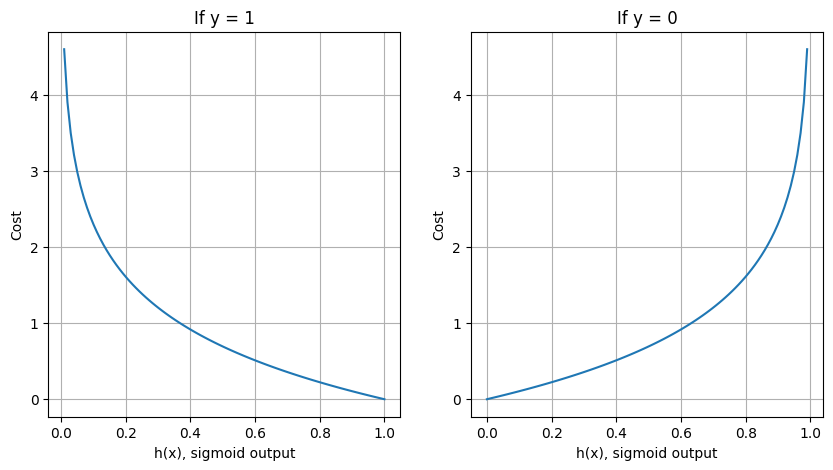

In [8]:
def cost_1(h):
    return -np.log(h)


def cost_0(h):
    return -np.log(1 - h)


plt.figure(figsize=(10, 5))
h = np.linspace(0, 1, 100)

plt.subplot(121)
plt.plot(h, cost_1(h))
plt.title('If y = 1')
plt.xlabel('h(x), sigmoid output')
plt.ylabel('Cost')
plt.grid()


plt.subplot(122)
plt.plot(h, cost_0(h))
plt.title('If y = 0')
plt.xlabel('h(x), sigmoid output')
plt.ylabel('Cost')
plt.grid()

plt.savefig(SAVEFIG_03)
plt.show()

In either $y = 1$ or $y = 0$, sigmoid function can output a number between 0 and 1. But because of the cost function, depending on label $y$, the computed cost differs.

- When $y = 1$, $h_{\theta}(x) \gg 0.5$, cost $\approx 0$. But as $h_{\theta}(x)$ gets smaller, larger cost.
- When $y = 0$, $h_{\theta}(x) \ll 0.5$, cost $\approx 0$. But as $h_{\theta}(x)$ gets larger, larger cost.

It makes sense because, when $y = 1$, logistic regression needs to predict a number $> 0.5$, and when $y = 0$, we want logistic regression to predict a number $< 0.5$. So in such cases, the cost is smaller. We want to minimize the cost.

## Gradient descent

One of many ways to compute parameters $\theta$ (or $\beta$) is **gradient descent**. Gradient descent is to take **derivative** of loss function (cost function) with respect to parameters and to **iteratively update** parameters. $\theta_i$ is current parameter. $\theta_{i + 1}$ is updated parameter. $\alpha$ is step size. $l(\theta)$ is loss function.

$$
\theta_{i + 1} = \theta_i - \alpha \frac{\partial l(\theta)}{\partial \theta}
$$

What we need to know is **the derivative of loss function in logistic regression with respect to parameter $\theta$**. The following is the necessary derivative rules.

**Derivative of log function** is,

$$
\frac{d}{dx} \log x = \frac{1}{x}
$$

**Derivative of exponential function** is,

$$
\frac{d}{dx} e^x = e^x
$$

**Chain rule** is,

$$
\frac{d}{d \theta} e^{\theta x} = (e^{\theta x})' (\theta x)' = e^{\theta x} x
$$

Because the loss function of logistic regression uses **sigmoid function**, we find the derivative of sigmoid function in advance. Use $\sigma(x)$ for sigmoid function here.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

**Derivative of sigmoid function** is,

$$
\frac{d \sigma(x)}{dx} = \left( \frac{1}{1 + e^{-x}} \right)'
$$
$$
= \left( (1 + e^{-x})^{-1} \right)'
$$

Because of chain rule,

$$
= -(1 + e^{-x})^{-2} (1 + e^{-x})' 
$$

By derivative of exponential function and chain rule,

$$
= -(1 + e^{-x})^{-2} e^{-x} (-x)'
$$
$$
= (1 + e^{-x})^{-2} e^{-x}
$$
$$
= \frac{e^{-x}}{(1 + e^{-x})^{2}} 
$$

**Add 1 and subtract 1 in the numerator**

$$
= \frac{1 - 1 + e^{-x}}{(1 + e^{-x})^{2}} 
$$
$$
= \frac{1 + e^{-x}}{(1 + e^{-x})^{2}} - \frac{1}{(1 + e^{-x})^2} 
$$

Taking $\frac{1}{1 + e^{-x}}$ outside,

$$
= \frac{1}{1 + e^{-x}} \left( \frac{1 + e^{-x}}{1 + e^{-x}} - \frac{1}{1 + e^{-x}} \right)
$$
$$
= \frac{1}{1 + e^{-x}} \left( 1 - \frac{1}{1 + e^{-x}} \right)
$$

Because $\frac{1}{1 + e^{-x}}$ is sigmoid function,

$$
\frac{d \sigma(x)}{dx} = \sigma(x) \left( 1 - \sigma(x) \right)
$$

We finished with derivative of sigmoid function. Going back to the loss function (cost function) of logistic regression. For simplicity, ignore $\frac{1}{n} \sum$ and $-$ negative signs for $y$ and $(1 - y)$.

$$
l(\theta) = y \log \frac{1}{1 + e^{-\theta x}} + (1 - y) \log (1 - \frac{1}{1 + e^{-\theta x}})
$$

Simplifying it by sigmoid notation,

$$
l(\theta) = y \log \sigma(\theta x) + (1 - y) \log (1 - \sigma(\theta x))
$$

Derivative of cost function with respect to $\theta$ is,

$$
\frac{\partial l(\theta)}{\partial \theta} = y \left( \log \sigma(\theta x) \right)' + (1 - y) \left( \log (1 - \sigma(\theta x)) \right)'
$$

By the derivative of log function and chain rule,

$$
= y \frac{1}{\sigma(\theta x)} \left( \sigma(\theta x) \right)' + (1 - y) \frac{1}{1 - \sigma(\theta x)} \left( 1 - \sigma(x) \right)'
$$

Because we found that the derivative of sigmoid function is $\sigma(x)(1 - \sigma(x))$ and by chain rule,

$$
= y \frac{1}{\sigma(\theta x)} \sigma(\theta x) (1 - \sigma(\theta x)) (\theta x)' + (1 - y) \frac{1}{1 - \sigma(\theta x)} (- \sigma(\theta x) ( 1 - \sigma(\theta x)))(\theta x)'
$$

By offsetting,

$$
= y (1 - \sigma(\theta x)) x + (1 - y) (- \sigma(\theta x)) x
$$

Taking $x$ outside,

$$
= (y (1 - \sigma(\theta x)) + (1 - y) (- \sigma(\theta x))) x
$$
$$
= (y - \sigma(\theta x)y - \sigma(\theta x) + \sigma(\theta x)y ) x
$$

Notice that $\sigma(\theta x)y$ also offset.

$$
\frac{\partial l(\theta)}{\partial \theta}= (y - \sigma(\theta x)) x
$$

We found the derivative of loss function in logistic regression. Going back to the gradient descent. This time we use $\frac{1}{n} \sum$ and $-$ negative sign.

$$
\theta_{i + 1} = \theta_i - \alpha \frac{\partial l(\theta)}{\partial \theta}
$$
$$
\theta_{i + 1} = \theta_i - \alpha \left[ - \frac{1}{n} \sum_{i = 1}^{n} (y^{(i)} - \sigma(\theta x^{(i)})) x^{(i)} \right]
$$

The above is gradient descent of logistic regression without regularization. 

We can include **regularization** in gradient descent. $j$ is index for features. $p$ is the number of features. $\theta_0$ is intercept.

$$
\theta_{0} = \theta_0 - \alpha \left[ - \frac{1}{n} \sum_{i = 1}^{n} (y^{(i)} - \sigma(\theta x^{(i)})) x^{(i)} \right]
$$
$$
\theta_{j} = \theta_j - \alpha \left[ - \frac{1}{n} \sum_{i = 1}^{n} (y^{(i)} - \sigma(\theta x^{(i)})) x^{(i)} + \frac{\lambda}{n} \theta_j \right] \quad (j = 1, 2, ...., p)
$$

## Parameter Interpretation

- If $\beta_j$ is positive, increasing $X_j$, increasing probability of $y = 1$.
- If $\beta_j$ is negative, increasing $X_j$, decreasing probability of $y = 1$.

One-unit increase in $X_j$ is associated with an increase in the **log odds (logit)** of $y = 1$ by $\beta_j$ units. Log odds is the following.

$$
log(\frac{p(X)}{1 - p(X)}) = \beta^T X
$$

**Odds** is the following.

$$
\frac{p(X)}{1 - p(X)} = e^{\beta^T X}
$$

In logistic regression, you **cannot** interpret one-unit increase in $X_j$ associated with the probability unit change.

## Maximum Likelihood

**Maximum likelihood** is a way to compute parameters $\beta$. The goal of maximum likelihood is to find parameters $\beta$ such that the likelihood function output is maximized.

In **the Elements of Statistical Learning (ESL)** binary classification where $y = 1$, $p(x; \beta)$ is the probability that label is positive, and $1 - p(x; \beta)$ is the probability that label is negative. $N$ is the number of data. $\beta$ is the parameters. ESL uses the following equation for **log-likelihood** for **maximum likelihood**.

**Log-likelihood** is,

$$
l(\beta) = \sum_{i = 1}^{N} \left[ y_i \log p(x_i; \beta) + (1 - y_i) \log (1 - p(x_i; \beta)) \right]
$$

**Maximum likelihood** sets the derivative of log-likelihood to zero to maximize the log-likelihood. The derivative is the same as the one we computed in gradient descent.

$$
\frac{\partial l(\beta)}{\partial \beta} = \sum_{i = 1}^{N} x_i (y_i - p(x_i; \beta)) = 0
$$

## Logistic regression vs. LDA

In **multiple-class classification**, discriminant analysis is more popular although logistic regression can do it, 

both logistic regression and LDA produces the **same linear decision boundary** like $\beta^T X$. But the ways to estimate parameters are different. Also, the result decision boundary could be different.

- Logistic regression gets parameters by **maximum likelihood**. Logistic regression is better than LDA if Gaussian assumptions are not met.
- LDA gets parameters by the computed mean and variance from a **normal (Gaussian) distirbution**. LDA is better than logistic regression if Gaussian assumption is met and data is small.

## Interpret coefficients for categorical and boolean variables

If a coefficient has a positive sign, the variable has a higher likelihood of having a positive influence on the outcome variable. A negative sign means an inverse relationship. If a value of the boolean variable is 1, the effectis counted, but if 0, not. If we restrict the analysis to boolean variables, we can interpret that the magnitude of the coefficients are the effect that the variable has on the outcome so that we can know which boolean variables are more important on the outcome.

Categorical variables are variables with more than 2 categories. We should apply one-hot encoding to the variables and create multiple boolean columns, because we want to avoid the possibility of the model learning a ranking structure. Since categorical variables has boolean structure, we can apply the same interpretation as boolean variables.

## Reference

- [Machine Learning by Stanford University | Coursera](https://www.coursera.org/learn/machine-learning)
- An Introduction to Statistical Learning, 4.3 Logistic Regression
- The Elements of Statistical Learning, 4.4 Logistic Regression
- [sklearn.linear_model.LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [The Derivative of Cost Function for Logistic Regression](https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d)